In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Define the start and end dates
start_date = '2015-01-01'
end_date = '2019-12-31'

# Download  monthly stock prices
yum_monthly_data = yf.download('YUM', start=start_date, end=end_date, interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [21]:
# Calculate Monthly Log Returns & Annualized Return
yum_monthly_data['LogRet'] = np.log(yum_monthly_data['Adj Close'] / yum_monthly_data['Adj Close'].shift(1))

# Print Monthly Log Returns & Annualized Return
yum_average_monthly_return = yum_monthly_data['LogRet'].mean()
yum_annualized_return = yum_average_monthly_return * 12  # Assuming 12 months in a year

print(f'Yum Average Monthly Log Return: {yum_average_monthly_return * 100:.2f}%')
print(f'Yum Annualized Return: {yum_annualized_return * 100:.2f}%')

Yum Average Monthly Log Return: 1.29%
Yum Annualized Return: 15.42%


In [4]:
# Calculate Annualised Volatility
yum_annualized_volatility = yum_monthly_data['LogRet'].std() * np.sqrt(12)

# Print Annualised Volatility
print(f'Yum Annualized Volatility: {yum_annualized_volatility * 100:.2f}%')

Yum Annualized Volatility: 17.49%


In [5]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yesg

In [7]:
ESG = yesg.get_historic_esg('YUM')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,58.00,52.00,61.00,64.00
2014-10-01,58.00,52.00,61.00,64.00
2014-11-01,58.00,52.00,61.00,64.00
2014-12-01,58.00,51.00,63.00,64.00
2015-01-01,58.00,51.00,63.00,64.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,21.12,4.40,11.65,5.07
2022-06-01,NaN,NaN,NaN,NaN


            Total-Score  E-Score  S-Score  G-Score
Date                                              
2015-01-01        58.00    51.00    63.00    64.00
2015-02-01        58.00    51.00    63.00    64.00
2015-03-01        59.00    52.00    63.00    64.00
2015-04-01        59.00    52.00    63.00    64.00
2015-05-01        59.00    52.00    63.00    64.00
2015-06-01        57.00    52.00    58.00    64.00
2015-07-01        57.00    52.00    58.00    64.00
2015-08-01        57.00    52.00    58.00    64.00
2015-09-01        57.00    52.00    58.00    64.00
2015-10-01        57.00    52.00    58.00    64.00
2015-11-01        57.00    52.00    58.00    64.00
2015-12-01        57.00    55.00    56.00    64.00
2016-01-01        57.42    54.92    55.50    64.11
2016-02-01        57.72    55.67    55.50    64.11
2016-03-01        57.72    55.67    55.50    64.11
2016-04-01        55.42    55.67    48.93    64.12
2016-05-01        55.42    55.67    48.93    64.12
2016-06-01        55.68    55.1

Text(0.5, 1.0, 'ESG for Apple Inc.')

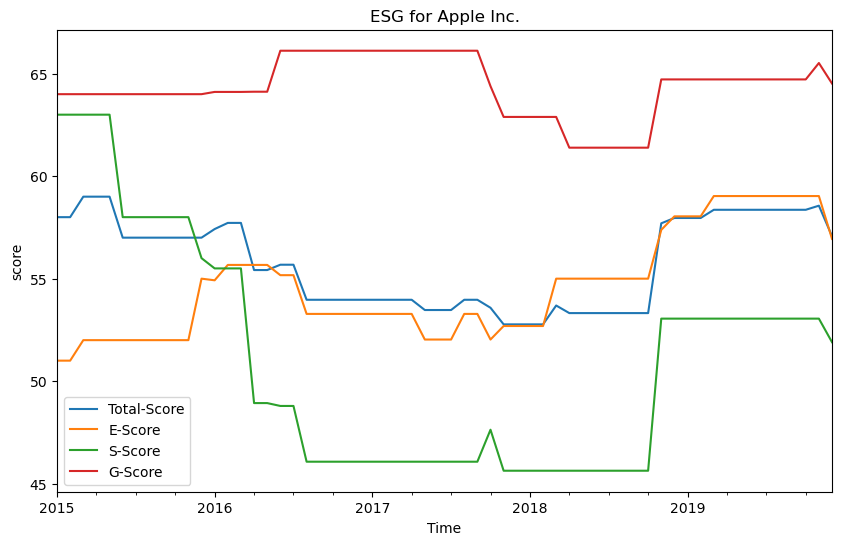

In [18]:
ESG.new = ESG.iloc[4:-32]
print(ESG.new)

# Plot the Figure
ESG.new.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG for Apple Inc.')

In [9]:
# Calculate correlation
correlation =yum_monthly_data['Adj Close'].corr(ESG.new['Total-Score'])

# Print the correlation
print(f"The correlation between stock price of YUM and it's total ESG score from Jan 2015 to Dec 2019 is {correlation:.4f}")

The correlation between stock price of YUM and it's total ESG score from Jan 2015 to Dec 2019 is 0.1420


In [10]:
# Question 2
# birth city: Prato, Italy. Month: Dec. Calculate: HDD

In [11]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [12]:
# Set the time
start = datetime(2022, 12, 1)
end = datetime(2022, 12, 31)

In [13]:
# Specifying the Location
location = Point(43.8777, 11.1022, 65)

In [14]:
# Fetching the Daily Data
data = Daily(location, start, end)
data = data.fetch()

In [15]:
# HDD calculation
T_base = 18
hdds = [max(T_base - temp, 0) for temp in data.tavg]
total_hdd = sum(hdds)
print("HDDs: ", hdds)
print("Total HDD:", total_hdd)

HDDs:  [9.8, 12.9, 9.0, 6.4, 5.4, 5.800000000000001, 6.800000000000001, 9.2, 6.0, 5.199999999999999, 9.8, 15.2, 12.6, 11.0, 8.6, 5.6, 6.800000000000001, 10.4, 12.8, 8.0, 7.4, 7.5, 6.6, 5.0, 5.0, 4.800000000000001, 4.199999999999999, 5.6, 5.0, 5.0, 4.199999999999999]
Total HDD: 237.6
